In [ ]:
# this file analyzes how word freqeucny evolves by time (in R)
# require: word_freq_evolve.csv

In [1]:
library(reshape2)
library(dplyr)
library(ggplot2); theme_set(theme_bw())

Warning message:
"package 'reshape2' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [2]:
word_freq_evolve <- read.csv("word_freq_evolve.csv", check.names=F)
colnames(word_freq_evolve)[1] <- 'word'
word_freq_evolve

word,80to89,90to99,00to09,10to15
mental,0.019709929,0.02505527,0.04507042,0.07623106
anxieti,0.040535515,0.03119627,0.03767606,0.05042614
emot,0.026775753,0.03119627,0.03661972,0.05871212
adolesc,0.019338044,0.01547531,0.03873239,0.05397727
memori,0.013387877,0.02038811,0.04471831,0.04782197
cortex,0.028635180,0.03856546,0.03028169,0.03338068
parent,0.020081815,0.01768607,0.02922535,0.05539773
engag,0.005206396,0.01154507,0.02007042,0.05113636
sexual,0.061732986,0.04544338,0.03908451,0.07125947
deficit,0.025288211,0.02210759,0.03169014,0.03906250


In [3]:
df_long <- melt(word_freq_evolve, id="word")  # convert to long format
df_long

word,variable,value
mental,80to89,0.019709929
anxieti,80to89,0.040535515
emot,80to89,0.026775753
adolesc,80to89,0.019338044
memori,80to89,0.013387877
cortex,80to89,0.028635180
parent,80to89,0.020081815
engag,80to89,0.005206396
sexual,80to89,0.061732986
deficit,80to89,0.025288211


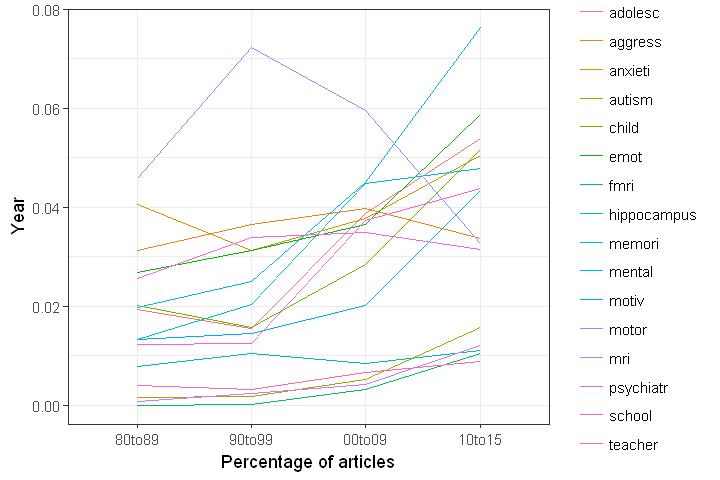

In [17]:
options(repr.plot.width=6, repr.plot.height=4)

top_freq_dict  <- c("mental", "memori", "anxieti", "child", "hippocampus", "mri", "aggress", "autism", "fmri", "adolesc", 
                    "lifestyle", "motiv", "motor", "psychiatr", "emot", "teacher", "school")
ggplot(data=filter(df_long, word %in% top_freq_dict), 
       aes(x=variable, y=value, group=word, color=word)) +
   geom_line() +
   labs(x = "Percentage of articles", y = "Year")

In [9]:
word_freq_evolve$word[1:20]

[1] mental    anxieti   emot      adolesc   memori    cortex    parent   
 [8] engag     sexual    deficit   perceiv   motor     percept   motiv    
[15] alcohol   child     distress  psychiatr stimuli   movement 
847 Levels: aberr abstin abstract abus academ acceler accompani ... youth